In [1]:
from resolved_pol import ResolvedPol

In [2]:
object = "W0116-0505"
band = "v_HIGH"
mjds = [60143]

star_ex_ref = 1398 #1394 #1574
star_ey_ref = 412 #629 #81

#We'll use the source itself for pointing offsets. 
source_ex_ref =  1021.5
source_ey_ref = 70.0

mkdir: stamps: File exists


-0.1 -91.7


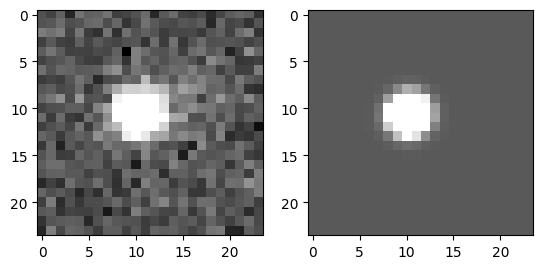

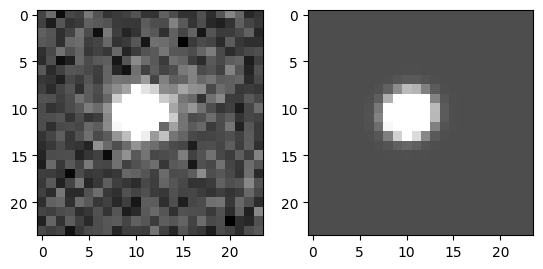

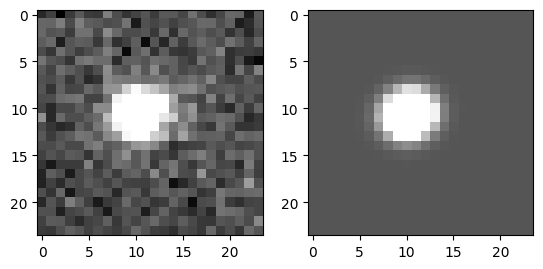

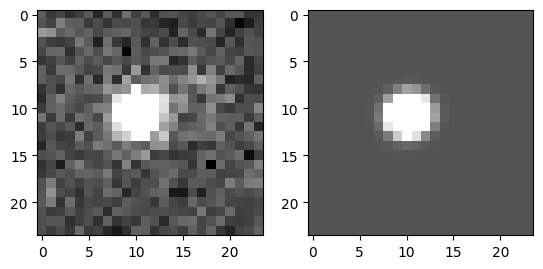

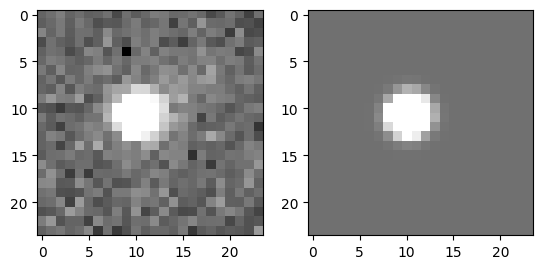

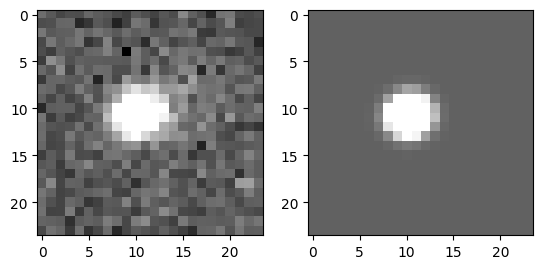

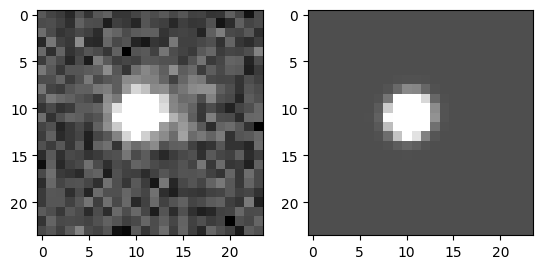

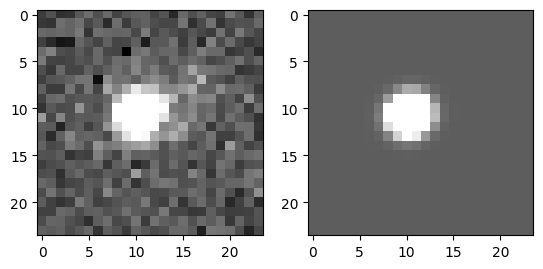

[0.67717558 0.72982375 0.89549227 0.69142916 0.69062675 0.71246978
 0.66492439 0.71063712]
Target FWHM:  0.9
0.9989946153219255 0.2517466430611252


0.8874860388890186 0.2236464818000327


0.15160468675263467 0.03820438106166393


0.9708724655937079 0.2446598613296144


0.9724929795446924 0.24506823084526247


0.9266658605714343 0.23351979686400146


1.0220971964858567 0.2575684935144359


0.9306534919364325 0.23452467996798101


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)


In [3]:
rpos = list()
for k, mjd in enumerate(mjds):

    rpo = ResolvedPol(object=object, band=band, mjd=mjd)
    rpo.find_shift(ex_ref=source_ex_ref, ey_ref=source_ey_ref)
    print(rpo.dx_use, rpo.dy_use)

    stddev_0 = 3.0
    x_mean_0 = None
    rpo.find_seeing(ex_ref=star_ex_ref, ey_ref=star_ey_ref, stddev_0=stddev_0, x_mean_0 = 8, show_plots=True)
    print(rpo.seeing)

    rpo.get_pol(regularize_psf=True)

    rpos.append(rpo)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

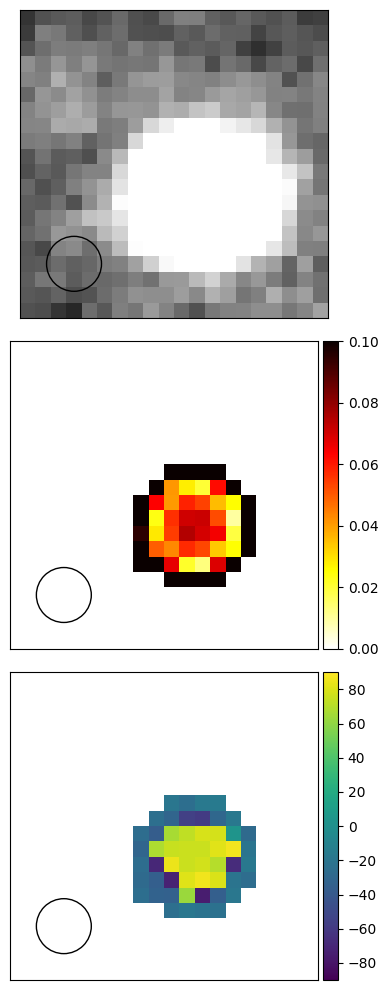

In [10]:
fig, axs = plt.subplots(3,1,figsize=(8,10), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])


stack1 = rpos[0].stack[1]
size = 20
ix1 = int(rpos[0].stack.shape[1]/2 - size/2)
ix2 = int(rpos[0].stack.shape[1]/2 + size/2)
iy1 = int(rpos[0].stack.shape[0]/2 + size/2)
iy2 = int(rpos[0].stack.shape[0]/2 - size/2)
#print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(rpos[0].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0].imshow(rpos[0].stack[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

cm_pf = axs[1].imshow(rpos[0].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.0, vmax=0.1)
divider_pf = make_axes_locatable(axs[1])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

cm_pa = axs[2].imshow(rpos[0].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
divider_pa = make_axes_locatable(axs[2])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

for j in range(3):
    beam  = plt.Circle((size*0.15,size*0.8),rpos[0].target_fwhm_pix/2, color='k', fill=False)
    axs[j].add_patch(beam)

fig.tight_layout()
plt.show()